In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data = np.load('C:\gwd-python-programs\\50ksanplingSquare0-10at10Hz_data.npy')
input_data = np.load('C:\gwd-python-programs\\50ksamplingSquare0-10at10Hz_Input_data.npy')

<>:1: SyntaxWarning: invalid escape sequence '\g'
<>:2: SyntaxWarning: invalid escape sequence '\g'
<>:1: SyntaxWarning: invalid escape sequence '\g'
<>:2: SyntaxWarning: invalid escape sequence '\g'
C:\Users\quant\AppData\Local\Temp\ipykernel_23272\2447935440.py:1: SyntaxWarning: invalid escape sequence '\g'
  data = np.load('C:\gwd-python-programs\\50ksanplingSquare0-10at10Hz_data.npy')
C:\Users\quant\AppData\Local\Temp\ipykernel_23272\2447935440.py:2: SyntaxWarning: invalid escape sequence '\g'
  input_data = np.load('C:\gwd-python-programs\\50ksamplingSquare0-10at10Hz_Input_data.npy')


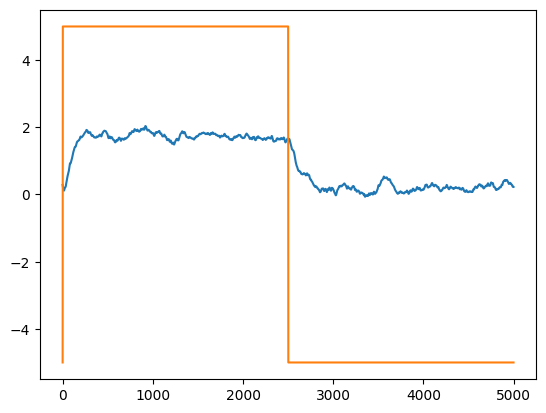

In [15]:
plt.plot(data[:5_000])
plt.plot(input_data[:5_000])

In [18]:
np.save('//unicph.domain/groupdir/SCI-NBI-quantop-data/data/gwd/Experimental Data/atoms/2025/2025-05-08 - Christian ML DAQ/50ksamplingSquare0-10at50Hz_Input_data_0.npy', np.zeros(1))

In [351]:
max_samples = 1000
samples_per_frame = 1000
amplitude = 10
center = 0

gaussian = np.random.normal(0, 1, max_samples)
cumsum = np.cumsum(gaussian)

scaled = (cumsum - np.min(cumsum))
scaled = amplitude*scaled/np.max(scaled) - amplitude/2 + center

# def genfunc():
#     for i in range(int(max_samples/samples_per_frame)):
#         yield scaled[i*samples_per_frame:(i+1)*samples_per_frame]
# plt.plot(scaled)
print(scaled.shape)
print(np.repeat(np.expand_dims(scaled, axis = 1), 2, axis =1).T.shape)

(1000,)
(2, 1000)


In [235]:
next(genfunc())

array([-1.96331156e-01, -2.13494707e-01, -9.44770012e-01, -1.08618789e+00,
        3.71762429e-01,  6.96436523e-01,  1.34834153e+00,  9.68698799e-01,
        2.26229439e+00,  2.96651019e+00,  3.63674331e+00,  2.20271288e+00,
        4.38780564e-01,  1.42371837e+00, -4.46862973e-01, -1.07857059e+00,
       -3.75497681e-01, -3.47032267e-02, -5.85456403e-01, -2.07468205e+00,
       -1.67691459e+00, -1.39092507e+00, -3.15503042e+00, -2.34148915e+00,
       -2.63364455e-01,  2.96396990e-01, -1.84766341e-01,  5.22711935e-01,
        2.25985023e+00,  7.48946929e-01,  5.78906966e-01,  2.03278962e+00,
        2.33420803e+00,  3.31092377e+00,  3.80590484e+00,  3.47557368e+00,
        2.29293443e+00, -1.26595647e-02, -2.44168209e-01, -2.31158489e+00,
       -5.74581447e-01, -1.49401805e-01,  2.04135739e-01,  5.06581574e-01,
       -3.76207221e-01, -4.01750142e-01, -6.62656508e-02, -8.57393809e-01,
       -5.55355529e-01, -1.10286574e+00, -6.78857034e-01, -1.27509050e+00,
       -1.91155601e+00, -

In [396]:
fs = 50_000  # sample rate for input and output.
sampling_time = 120
#NOTE: Depending on your hardware sample clock frequency and available dividers some sample rates may not be supported.
out_freq = 17

NR_OF_CHANNELS = 2  # this scrip supports only 2 I/O channels (do not change)
frames_per_buffer = 10  # nr of frames fitting into the buffer of each measurement channel.
# NOTE  With my NI6211 it was necessary to override the default buffer size to prevent under/over run at high sample
# rates.
refresh_rate_hz = 10
samples_per_frame = int(fs // refresh_rate_hz)

read_buffer = np.zeros((NR_OF_CHANNELS, samples_per_frame), dtype=np.float64)
timebase = np.arange(samples_per_frame) / fs


# local data
#global data
data = []

global input_data
input_data = []

#Gaussian random walk
amplitude = 10
center = 0

gaussian = np.random.normal(0, 1, fs*sampling_time)
cumsum = np.cumsum(gaussian)

scaled = (cumsum - np.min(cumsum))
scaled = amplitude*scaled/np.max(scaled) - amplitude/2 + center
scaled = np.repeat(np.expand_dims(scaled, axis = 1), 2, axis =1).T
def genfunc():
    for i in range(int(fs*sampling_time/samples_per_frame)+10):
        asd = scaled[:, i*samples_per_frame:(i+1)*samples_per_frame]
        # asd.setflags(write=0, align=0)
        yield np.ascontiguousarray(asd)



def sine_generator():

    amplitudes = [5, 5]

    frame_nr = 0
    data_frame = np.zeros((NR_OF_CHANNELS, samples_per_frame), dtype=np.float64)

    samples_per_period = fs / out_freq
    reminder_phase_rad = 2 * np.pi * (samples_per_frame % samples_per_period) / samples_per_period
    omega_t = 2 * np.pi * out_freq * timebase

    while True:
    # for _ in range(1000):
        phi = reminder_phase_rad * frame_nr
        for channel in range(NR_OF_CHANNELS):
            data_frame[channel] = amplitudes[channel]*np.sin(omega_t + phi)

        #Square wave
        for channel in range(NR_OF_CHANNELS):
            data_frame[channel] = np.array([amplitudes[channel] if x > 0 else 0 for x in data_frame[channel]])

        global input_data
        input_data += list(data_frame[1])
        yield data_frame
       
        frame_nr += 1

In [397]:
ting = genfunc()
for i in range(10):
    print(next(ting).flags)

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False



In [389]:
arr = np.ones(100)*2
arr.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False